In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("C:/users/humna/Downloads/Google Data.csv")
df.head()

,Origin,Destination,Time (hours),Distance (km)
0,Noida,Chandigarh,9.91,972.34
1,Kolkata,Chennai,2.82,168.83
2,Bangalore,Kolkata,1.76,144.81
3,Bangalore,Chennai,8.34,496.78
4,Hyderabad,Kolkata,2.04,147.99


In [33]:
beta_1,beta_0=np.polyfit(df['Distance (km)'],df['Time (hours)'],1)
beta_1

0.011205459214701596

In [8]:
beta_0

1.2842578568723981

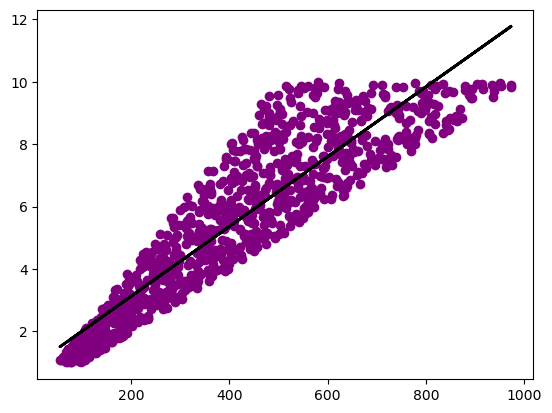

In [34]:
plt.scatter(df['Distance (km)'],df['Time (hours)'],color="purple")
plt.plot(df['Distance (km)'], beta_0 + beta_1*df['Distance (km)'], color="black", linestyle="-", linewidth=2) 

In [35]:
df['Predicted_Time']=beta_0+beta_1*df['Distance (km)']
df['Error']=df['Time (hours)']-df['Predicted_Time']
df['Relative_Error']=df['Error']/df['Time (hours)']
df['Absolute_Relative_Error'] = df['Relative_Error'].abs()
MAPE=df['Absolute_Relative_Error'].mean()*100


In [36]:
MAPE

18.706645945815648

In [16]:
#model's predictions are off by 18.70% compared to the actual heights

In [37]:
ssr = ((df['Time (hours)'] - df['Predicted_Time']) ** 2).sum()
ssr

1121.2633722471514

In [38]:
sst = ((df['Time (hours)'] - df['Time (hours)'].mean()) ** 2).sum()
sst

6884.0497164

In [39]:
R2=1-(ssr/sst)
R2

0.8371215464095292

In [23]:
#approximately 0.83 of the variation in height can be explained by variations in weight based on this model

In [40]:
n = len(df)
p = 1
adjusted_r_squared = 1 - (1 - R2) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.8369583415462121

In [31]:
#indicates that approximately 0.836 of the variance in height can be explained by variations in weight. This value is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the model for including irrelevant predictors, which can artificially inflate the R-squared value.